# Data Exploration and Analysis - Clean Version

This notebook contains streamlined data exploration and analysis using modular functions.

## Objectives
- Load and inspect the dataset
- Perform data preprocessing using custom functions
- Prepare data for modeling

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import custom functions
import sys
sys.path.append('../')
from functions.data_utils import (
    load_data, 
    basic_info, 
    split_data, 
    identify_column_types,
    handle_na,
    encode,
    scale,
    preprocess_pipeline,
    transform_new_data,
    save_transformers,
    load_transformers,
    plot_data_overview,
    plot_correlation_matrix,
    save_datasets,
    load_datasets,
    analyze_and_create_validation_schema,
    validate_data_entry
)

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

## Load and Inspect Data

Load the dataset and perform initial inspection.

## Configuration

Set up the configuration parameters for the analysis.

In [2]:
# Configuration parameters
TARGET_COLUMN = 'diagnosis'  # Change this to your target column name
DATA_FILE = '../data/depression.csv'  # Change this to your data file path

print(f"Target column: {TARGET_COLUMN}")
print(f"Data file: {DATA_FILE}")

Target column: diagnosis
Data file: ../data/depression.csv


In [3]:
# Load data
df = pd.read_csv(DATA_FILE)

# Display basic information
basic_info(df)

FileNotFoundError: [Errno 2] No such file or directory: '../data/depression.csv'

In [ ]:
# Check target variable distribution
print("Target variable distribution:")
print(df[TARGET_COLUMN].value_counts())
print("\nTarget variable percentages:")
print(df[TARGET_COLUMN].value_counts(normalize=True) * 100)

Target variable distribution:
diagnosis
Depression    401
ME/CFS        397
Both          202
Name: count, dtype: int64

Target variable percentages:
diagnosis
Depression    40.1
ME/CFS        39.7
Both          20.2
Name: proportion, dtype: float64


In [ ]:
# Display first few rows
df.head()

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both


## Data Preprocessing

Apply the complete preprocessing pipeline to prepare data for modeling.

In [ ]:
# Apply complete preprocessing pipeline
X_train, X_val, X_test, y_train, y_val, y_test, transformers = preprocess_pipeline(df, TARGET_COLUMN)

print(f"\nFeature columns in final dataset:")
print(f"Total features: {len(X_train.columns)}")
print(f"Feature names: {X_train.columns.tolist()}")

Train set: 600 samples
Validation set: 200 samples
Test set: 200 samples
Numeric columns: ['age', 'sleep_quality_index', 'brain_fog_level', 'physical_pain_score', 'stress_level', 'depression_phq9_score', 'fatigue_severity_scale_score', 'pem_duration_hours', 'hours_of_sleep_per_night', 'pem_present']
Categorical columns: ['gender', 'work_status', 'social_activity_level', 'exercise_frequency', 'meditation_or_mindfulness']
Missing values after imputation:
Training: 0
Validation: 0
Test: 0
Encoded categorical features shape:
Training: (600, 17)
Validation: (200, 17)
Test: (200, 17)
Numeric features scaled successfully.

Final processed dataset shapes:
Training: (600, 27)
Validation: (200, 27)
Test: (200, 27)

Feature columns in final dataset:
Total features: 27
Feature names: ['age', 'sleep_quality_index', 'brain_fog_level', 'physical_pain_score', 'stress_level', 'depression_phq9_score', 'fatigue_severity_scale_score', 'pem_duration_hours', 'hours_of_sleep_per_night', 'pem_present', 'gende

## Alternative: Step-by-Step Preprocessing

If you prefer to see each step individually, you can run the preprocessing functions one by one:

In [ ]:
# Step-by-step preprocessing (alternative approach)
# Uncomment and run if you want to see each step

# # 1. Split data
# X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, TARGET_COLUMN)

# # 2. Identify column types
# numeric_cols, categorical_cols = identify_column_types(X_train)

# # 3. Handle missing values
# X_train_clean, X_val_clean, X_test_clean, num_imp, cat_imp = handle_na(
#     X_train, X_val, X_test, numeric_cols, categorical_cols
# )

# # 4. Encode categorical variables (only if categorical columns exist)
# if categorical_cols:
#     X_train_cat_enc, X_val_cat_enc, X_test_cat_enc, cat_encoder = encode(
#         X_train_clean, X_val_clean, X_test_clean, categorical_cols
#     )
# else:
#     X_train_cat_enc = pd.DataFrame(index=X_train_clean.index)
#     X_val_cat_enc = pd.DataFrame(index=X_val_clean.index)
#     X_test_cat_enc = pd.DataFrame(index=X_test_clean.index)

# # 5. Scale numeric features (only if numeric columns exist)
# if numeric_cols:
#     X_train_num_scaled, X_val_num_scaled, X_test_num_scaled, num_scaler = scale(
#         X_train_clean[numeric_cols], X_val_clean[numeric_cols], X_test_clean[numeric_cols], numeric_cols
#     )
# else:
#     X_train_num_scaled = pd.DataFrame(index=X_train_clean.index)
#     X_val_num_scaled = pd.DataFrame(index=X_val_clean.index)
#     X_test_num_scaled = pd.DataFrame(index=X_test_clean.index)

# # 6. Combine final datasets
# X_train_final = pd.concat([X_train_num_scaled, X_train_cat_enc], axis=1)
# X_val_final = pd.concat([X_val_num_scaled, X_val_cat_enc], axis=1)
# X_test_final = pd.concat([X_test_num_scaled, X_test_cat_enc], axis=1)

## Data Visualization

Quick visualizations to understand the processed data.

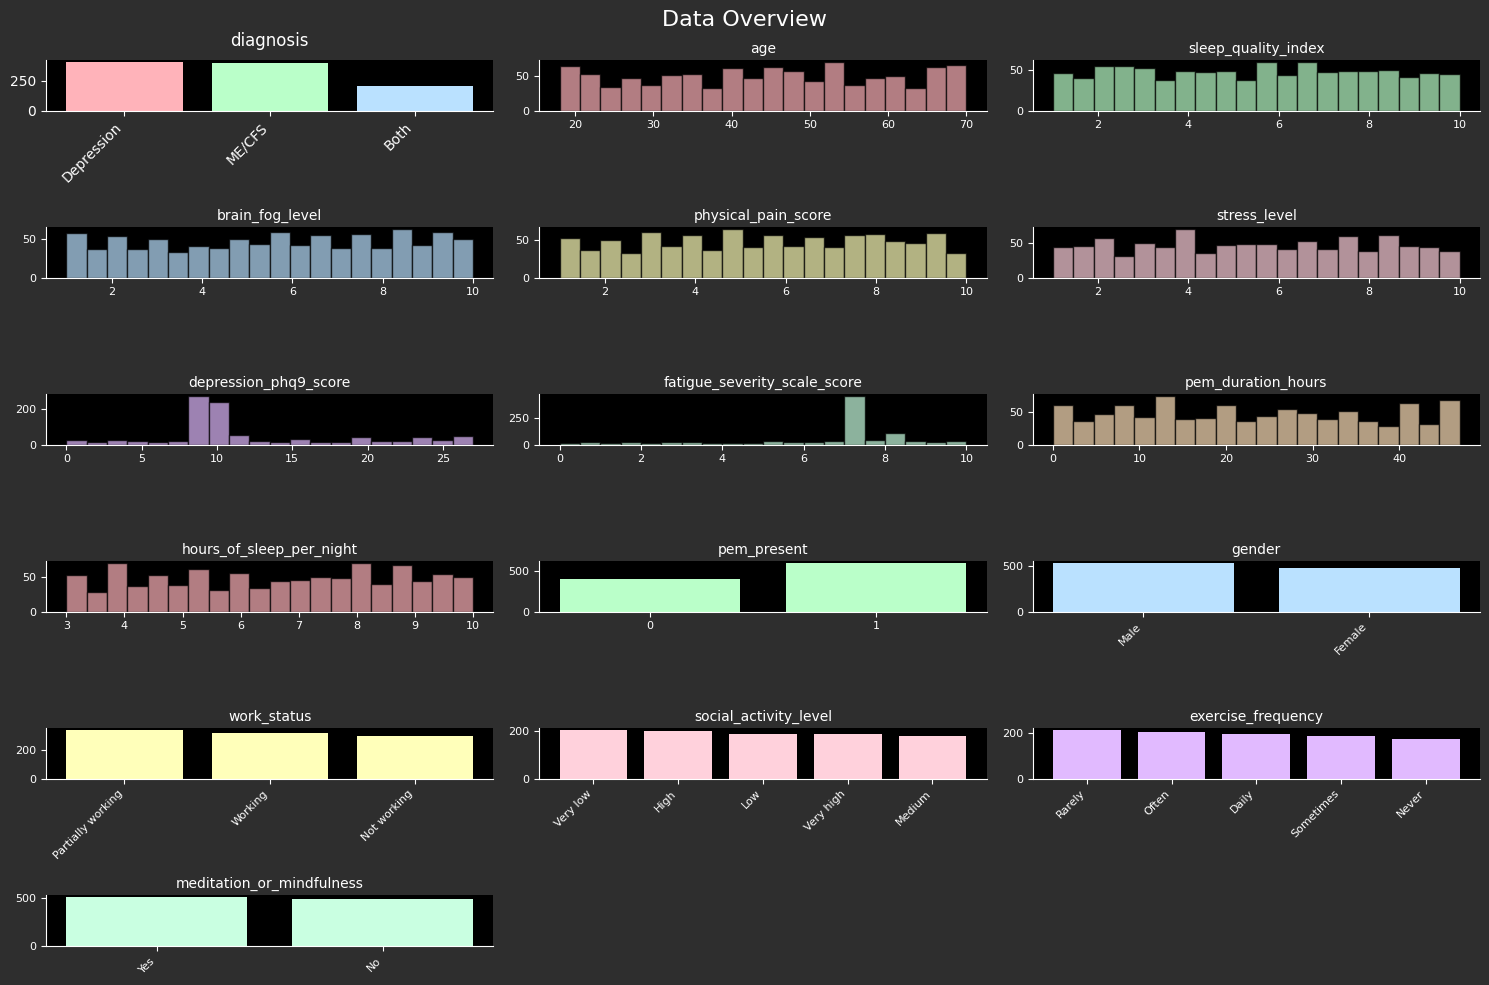

In [ ]:
# Create comprehensive data overview with dark theme and pastel colors
plot_data_overview(df, target_col=TARGET_COLUMN, figsize=(15, 10))

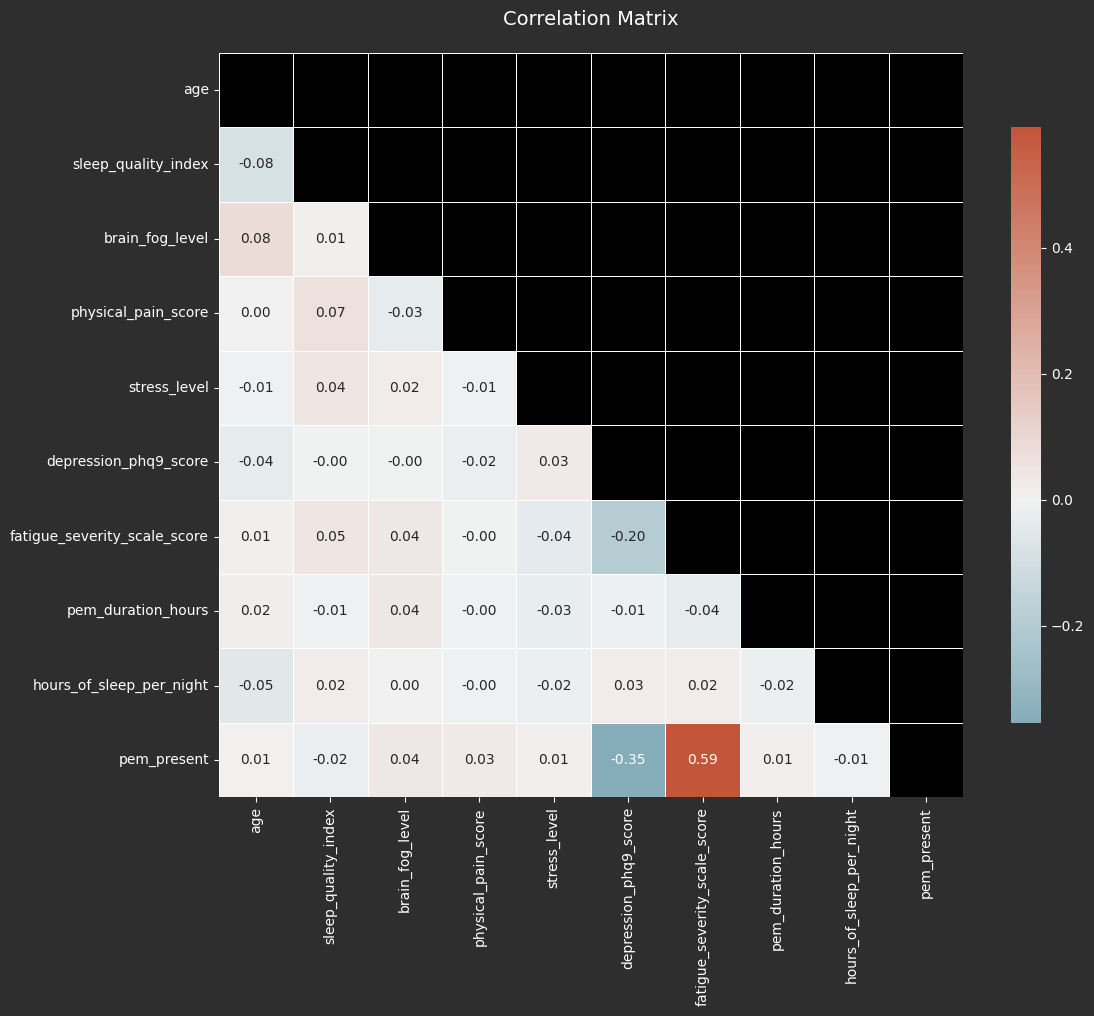

In [ ]:
# Plot correlation matrix for numeric features
plot_correlation_matrix(df, target_col=TARGET_COLUMN, figsize=(12, 10))

In [ ]:
# Display final dataset info
print("Final training set info:")
print(f"Shape: {X_train.shape}")
print(f"Missing values: {X_train.isnull().sum().sum()}")
print(f"Data types: {X_train.dtypes.value_counts()}")

Final training set info:
Shape: (600, 27)
Missing values: 0
Data types: float64    27
Name: count, dtype: int64


## Saving Transformers and Datasets

Save the fitted transformers and processed datasets for future use in production.

### File Structure:
- **Transformers**: `../models/transformers.pkl` - Contains all fitted preprocessing objects
- **Datasets**: `../data/datasets/` - Contains processed train/validation/test sets

In [ ]:
# Save transformers for future use
save_transformers(transformers, '../models/transformers.pkl')

# Save processed datasets
save_datasets(X_train, X_val, X_test, y_train, y_val, y_test, '../data/datasets')

print("\n" + "="*50)
print("✅ All preprocessing artifacts saved successfully!")
print("="*50)

Transformers saved to ../models/transformers.pkl
Datasets saved successfully to ../data/datasets/
Files saved:
  - X_train.csv: (600, 27)
  - X_val.csv: (200, 27)
  - X_test.csv: (200, 27)
  - y_train.csv: (600,)
  - y_val.csv: (200,)
  - y_test.csv: (200,)

✅ All preprocessing artifacts saved successfully!


In [ ]:
# Analisi automatica e creazione schema di validazione
validation_schema = analyze_and_create_validation_schema(df, TARGET_COLUMN)

📊 ANALISI PER VALIDAZIONE DATI

🔢 FEATURE NUMERICHE (10):
----------------------------------------
age                            | Min:    18.00 | Max:    70.00 | Type: int64 | Nulls: False
sleep_quality_index            | Min:     1.00 | Max:    10.00 | Type: float64 | Nulls: True
brain_fog_level                | Min:     1.00 | Max:    10.00 | Type: float64 | Nulls: True
physical_pain_score            | Min:     1.00 | Max:    10.00 | Type: float64 | Nulls: True
stress_level                   | Min:     1.00 | Max:    10.00 | Type: float64 | Nulls: True
depression_phq9_score          | Min:     0.00 | Max:    27.00 | Type: float64 | Nulls: True
fatigue_severity_scale_score   | Min:     0.00 | Max:    10.00 | Type: float64 | Nulls: True
pem_duration_hours             | Min:     0.00 | Max:    47.00 | Type: float64 | Nulls: True
hours_of_sleep_per_night       | Min:     3.00 | Max:    10.00 | Type: float64 | Nulls: True
pem_present                    | Min:     0.00 | Max:     1.00 | 